## Task5: To find the most successful teams,players and factors affecting win or loss

# Author: Ritu Raj

In [1]:
#Packages for data handling
import pandas as pd
import numpy as np

#Packages for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Reading of data

In [2]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.shape

(756, 18)

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
#Checking for null values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
#Filling the null value
matches.fillna('No information')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No information
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,No information
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,No information
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,No information
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,No information,No information,No information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,No information,No information,No information
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


## Exploratory Data Analysis

In [10]:
#No. of matches played
matches.shape[0]

756

In [11]:
#Total match played in each season
matches['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

C:\Users\rajri\.conda\envs\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


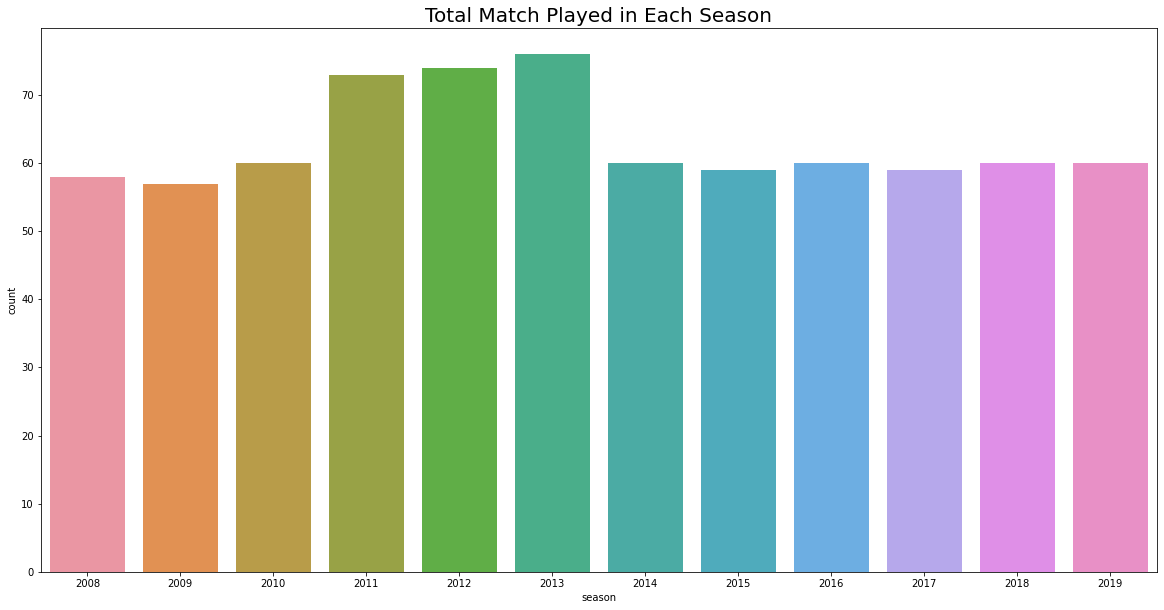

In [12]:
plt.figure(figsize=(20,10))
sns.countplot('season',data=matches)
plt.title('Total Match Played in Each Season',fontsize=20)
plt.show()

In [13]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

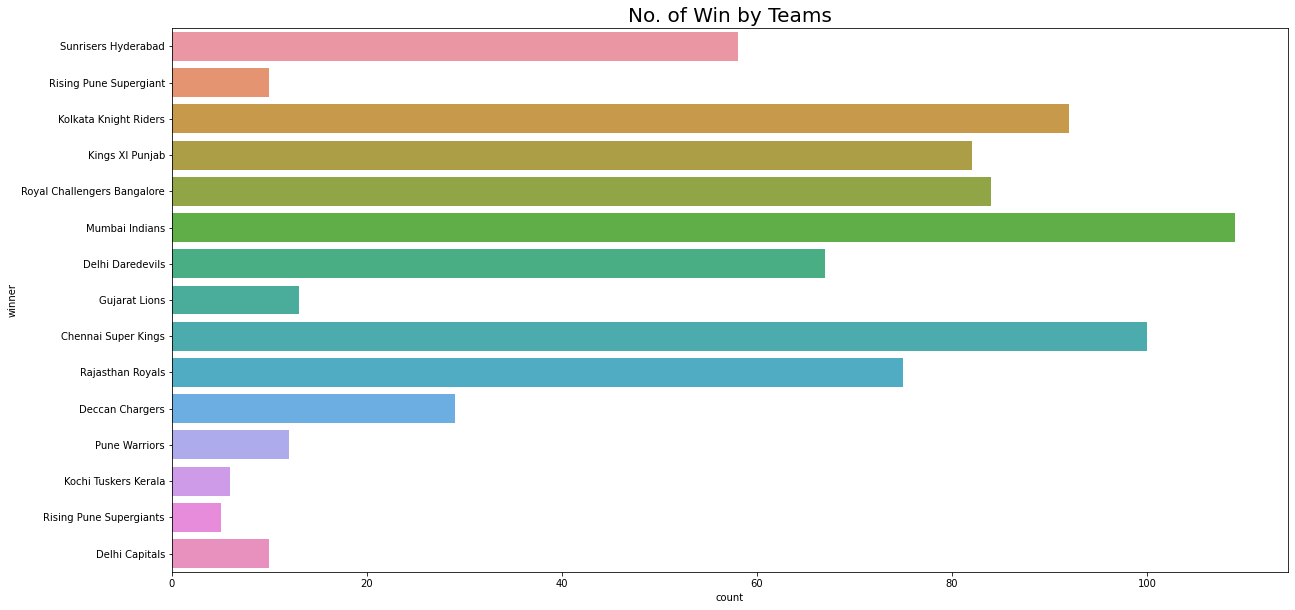

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(y='winner',data=matches)
plt.title('No. of Win by Teams',fontsize=20)
plt.show()

In [15]:
champions=matches.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)

In [16]:
champions

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


C:\Users\rajri\.conda\envs\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


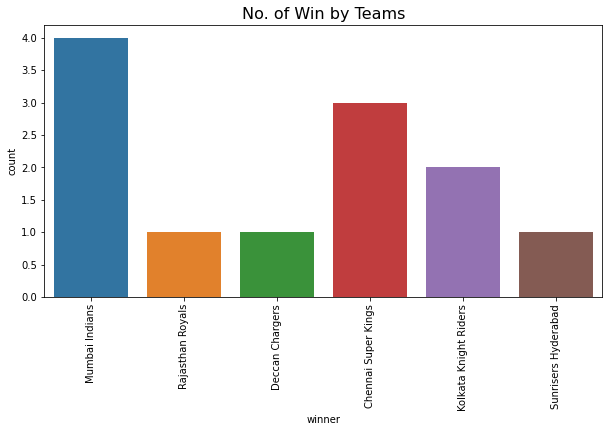

In [17]:
plt.figure(figsize=(10,5))
sns.countplot('winner',data=champions)
plt.title('No. of Win by Teams',fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [18]:
#big margin win by run
matches[(matches['win_by_runs']>100)].winner.value_counts()

Royal Challengers Bangalore    3
Mumbai Indians                 2
Sunrisers Hyderabad            1
Kings XI Punjab                1
Kolkata Knight Riders          1
Rajasthan Royals               1
Name: winner, dtype: int64

C:\Users\rajri\.conda\envs\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Mumbai Indians'),
  Text(2, 0, 'Sunrisers Hyderabad'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Kolkata Knight Riders'),
  Text(5, 0, 'Rajasthan Royals')])

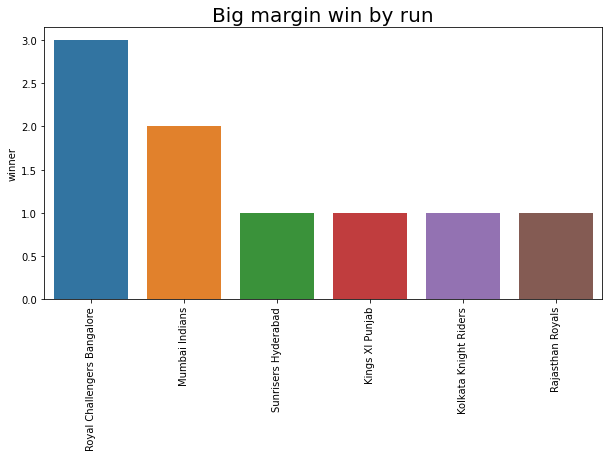

In [19]:
plt.figure(figsize=(10,5))
x=matches[(matches['win_by_runs']>100)].winner.value_counts().index
y=matches[(matches['win_by_runs']>100)].winner.value_counts()
sns.barplot(x,y)
plt.title('Big margin win by run',fontsize=20)
plt.xticks(rotation=90)

In [20]:
#Big margin win by wickets
matches[(matches['win_by_wickets']>8)].winner.value_counts()

Royal Challengers Bangalore    11
Delhi Daredevils                7
Mumbai Indians                  6
Sunrisers Hyderabad             5
Chennai Super Kings             5
Kolkata Knight Riders           5
Kings XI Punjab                 3
Rajasthan Royals                3
Rising Pune Supergiant          1
Rising Pune Supergiants         1
Deccan Chargers                 1
Name: winner, dtype: int64

C:\Users\rajri\.conda\envs\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Delhi Daredevils'),
  Text(2, 0, 'Mumbai Indians'),
  Text(3, 0, 'Sunrisers Hyderabad'),
  Text(4, 0, 'Chennai Super Kings'),
  Text(5, 0, 'Kolkata Knight Riders'),
  Text(6, 0, 'Kings XI Punjab'),
  Text(7, 0, 'Rajasthan Royals'),
  Text(8, 0, 'Rising Pune Supergiant'),
  Text(9, 0, 'Rising Pune Supergiants'),
  Text(10, 0, 'Deccan Chargers')])

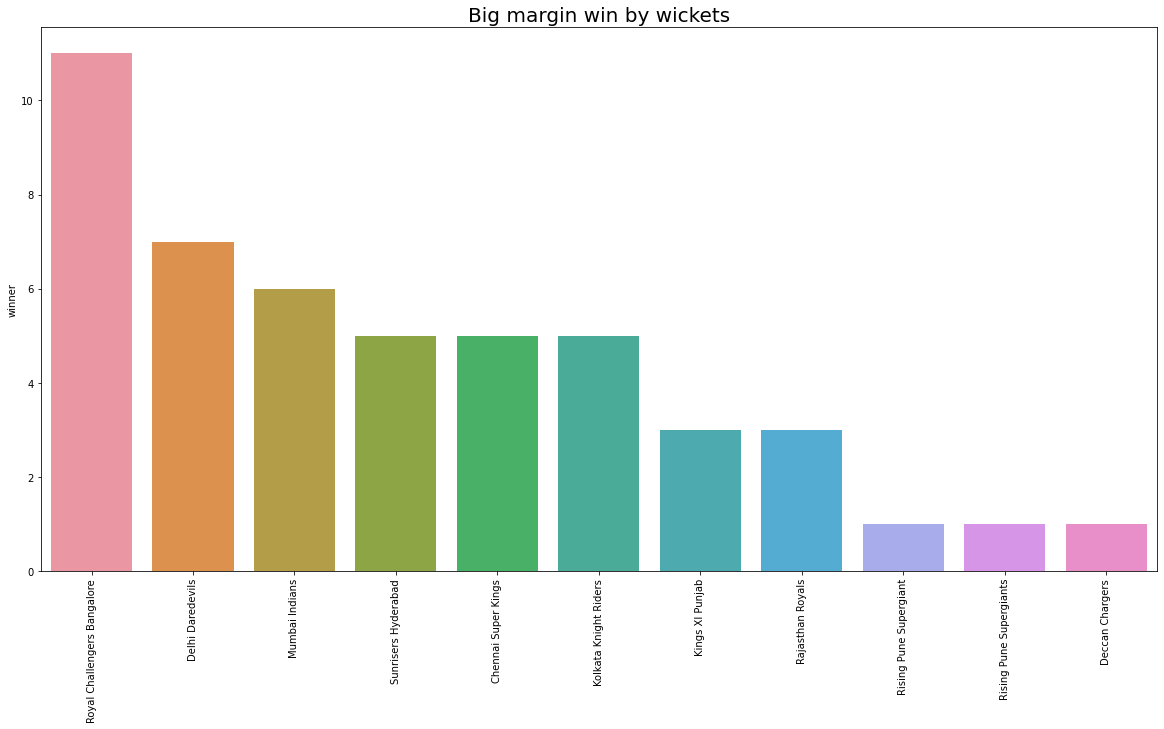

In [21]:
plt.figure(figsize=(20,10))
x=matches[(matches['win_by_wickets']>8)].winner.value_counts().index
y=matches[(matches['win_by_wickets']>8)].winner.value_counts()
sns.barplot(x,y)
plt.title('Big margin win by wickets',fontsize=20)
plt.xticks(rotation=90)

In [22]:
#win by highest runs
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [23]:
#win by highest wickets
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [24]:
#Total match played by each teams
a=matches['team1'].value_counts()+matches['team2'].value_counts()
#Total match won by each team
b=matches['winner'].value_counts()
#Total match lost by each team
c=a-b
#Won percentage
d=(b/a)*100
#loss percentage
e=100-d

print('Total match played by each teams',a)
print('Total match won by each teams',b)
print('Total match lost by each teams',c)
print('Percentage won by each teams',d)
print('Percentage lost by each teams',e)

Total match played by each teams Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64
Total match won by each teams Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals

In [25]:
summary=pd.DataFrame({'Total Match Played':a,'Total Match Won':b,'Total Match lost':c,'Percentage Won':d,'Percentage Lost':e})
summary=summary.reset_index()
summary.rename(columns={'index':'Teams'},inplace=True)
summary

,Teams,Total Match Played,Total Match Won,Total Match lost,Percentage Won,Percentage Lost
0,Chennai Super Kings,164,100,64,60.975610,39.024390
1,Deccan Chargers,75,29,46,38.666667,61.333333
2,Delhi Capitals,16,10,6,62.500000,37.500000
3,Delhi Daredevils,161,67,94,41.614907,58.385093
4,Gujarat Lions,30,13,17,43.333333,56.666667
5,Kings XI Punjab,176,82,94,46.590909,53.409091
6,Kochi Tuskers Kerala,14,6,8,42.857143,57.142857
7,Kolkata Knight Riders,178,92,86,51.685393,48.314607
8,Mumbai Indians,187,109,78,58.288770,41.711230
9,Pune Warriors,46,12,34,26.086957,73.913043


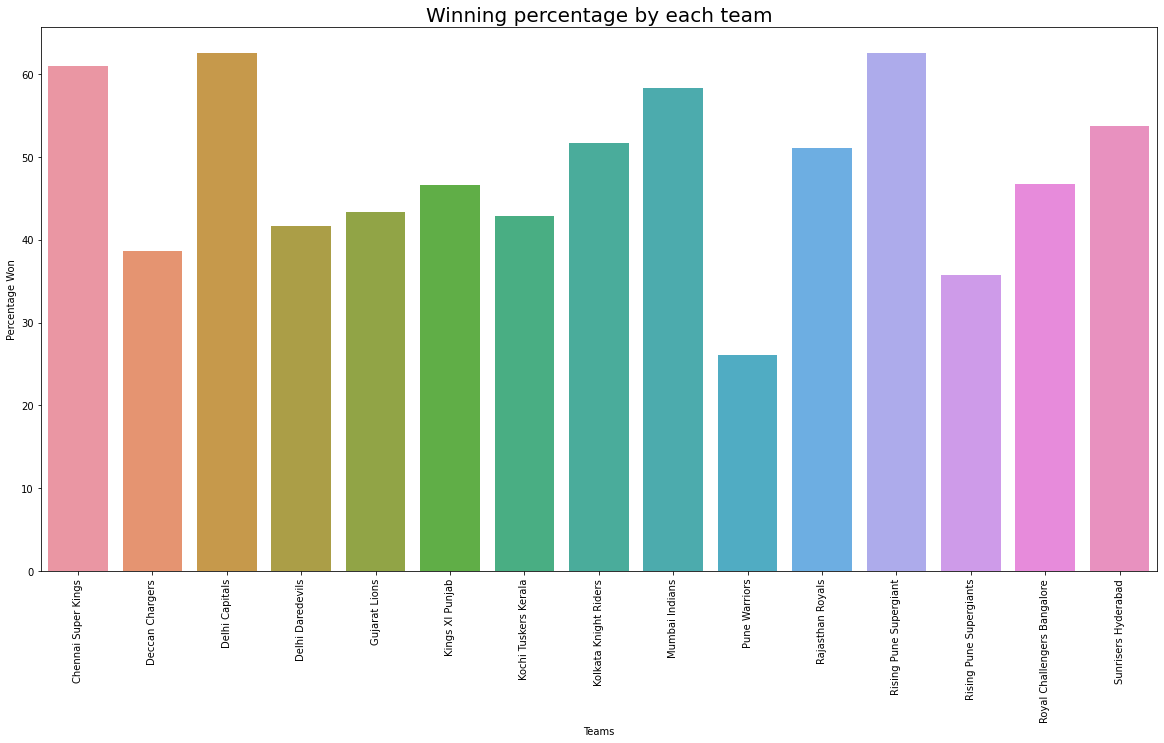

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='Teams',y='Percentage Won',data=summary)
plt.title('Winning percentage by each team',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [27]:
matches['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
HH Gibbs           1
CR Brathwaite      1
J Archer           1
MS Gony            1
YS Chahal          1
Name: player_of_match, Length: 226, dtype: int64

C:\Users\rajri\.conda\envs\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


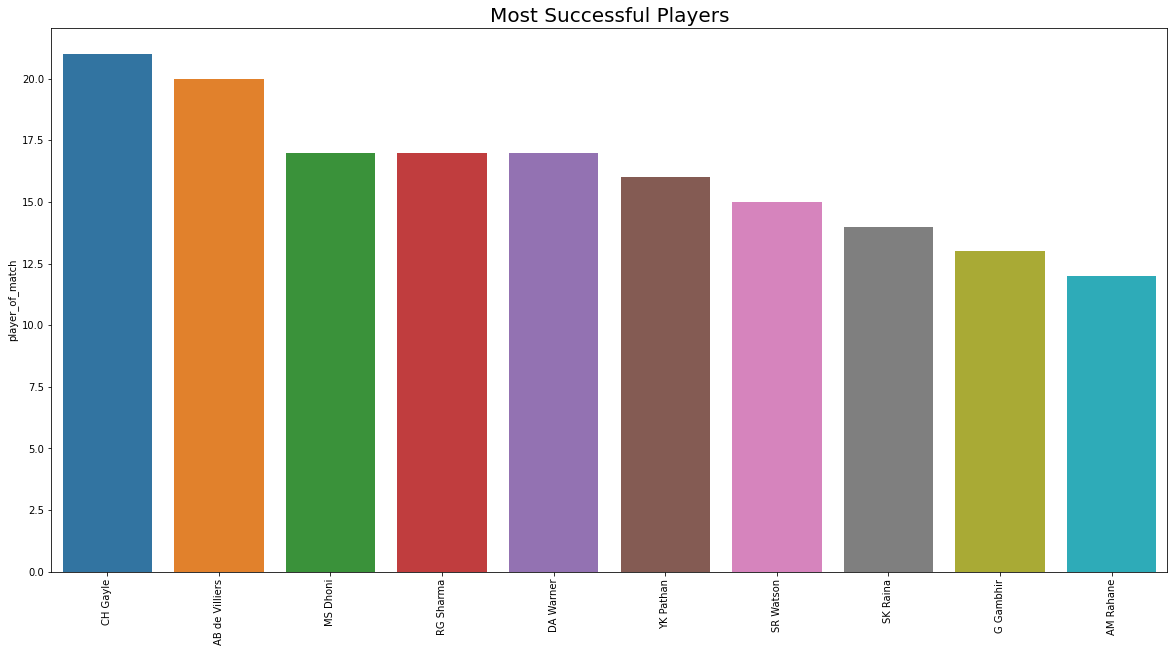

In [28]:
plt.figure(figsize=(20,10))
x=matches['player_of_match'].value_counts()[:10].index
y=matches['player_of_match'].value_counts()[:10]
sns.barplot(x,y)
plt.title('Most Successful Players',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [29]:
toss_match_win=matches['toss_winner'] == matches['winner']
toss_match_win.groupby(toss_match_win).size()

False    363
True     393
dtype: int64

C:\Users\rajri\.conda\envs\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


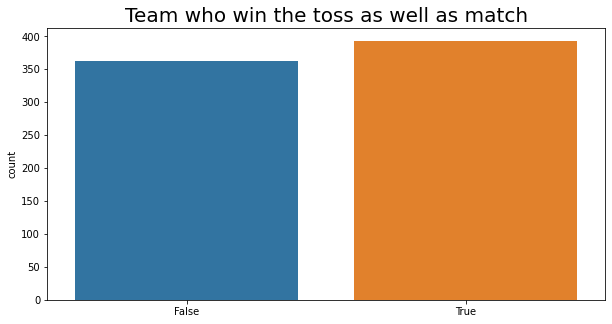

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(toss_match_win)
plt.title('Team who win the toss as well as match',fontsize=20)
plt.show()

In [31]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [32]:
deliveries.shape

(179078, 21)

In [33]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [34]:
#Total no. of superover
deliveries['is_super_over'].sum()

81

In [35]:
#Total Wide runs
deliveries['wide_runs'].sum()

6576

In [36]:
#Total Bye runs
deliveries['bye_runs'].sum()

884

In [37]:
#Total legbye runs
deliveries['legbye_runs'].sum()

3785

In [38]:
#Total noball runs
deliveries['noball_runs'].sum()

749

In [39]:
#Total penalty runs
deliveries['penalty_runs'].sum()

10

In [40]:
#Total extra runs
deliveries['extra_runs'].sum()

12004

In [41]:
deliveries['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

C:\Users\rajri\.conda\envs\data_science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


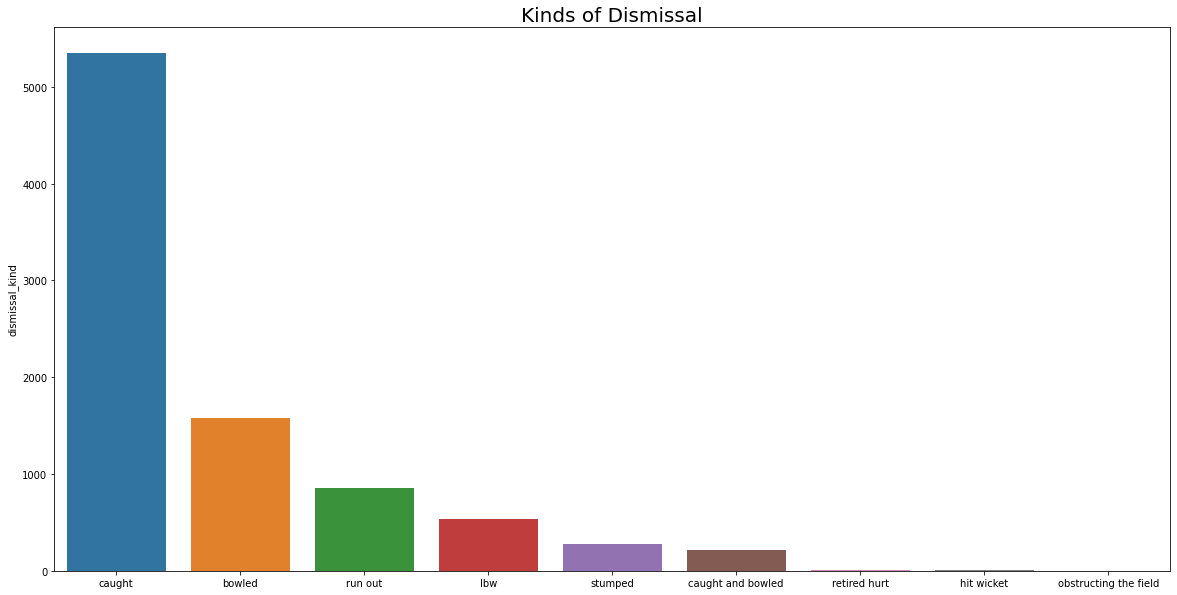

In [42]:
plt.figure(figsize=(20,10))
x=deliveries['dismissal_kind'].value_counts().index
y=deliveries['dismissal_kind'].value_counts()
sns.barplot(x,y)
plt.title('Kinds of Dismissal',fontsize=20)
plt.show()

# Conclusion:

1. Mumbai Indians has won the highest number of matches.

2. Mumbai Indians has won maximum number (4 times) of trophies followed by Chennai Superkings and Kolkata Knightriders.

3. Chris Gayle is the most successfull players as he won maximum number of player of match.

4. RCB has won maximum number of times by big margin.

5. Top 3 winning percentage team:
a)Delhi Capitals
b)Rising Pune Supergiants
c)Chennai Superkings

6. Maximum players dismissed by caught.

Thank You